<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-0.000226,129.835252,129.835121,0.000131
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-0.000246,175.520814,175.520567,0.000247
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.000019,237.105568,237.106350,-0.000783
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-0.000111,307.747527,307.746824,0.000703
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-0.000038,263.789667,263.789252,0.000415
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,0.000044,287.992131,287.991851,0.000280
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,0.000796,193.170485,193.169968,0.000516
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-0.000312,333.567374,333.567015,0.000359
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,0.000234,257.476864,257.477075,-0.000211


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-0.000226,129.835252,129.835121,0.000131
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-0.000246,175.520814,175.520567,0.000247
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.000019,237.105568,237.106350,-0.000783
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-0.000111,307.747527,307.746824,0.000703
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-0.000038,263.789667,263.789252,0.000415
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,0.000044,287.992131,287.991851,0.000280
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,0.000796,193.170485,193.169968,0.000516
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-0.000312,333.567374,333.567015,0.000359
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,0.000234,257.476864,257.477075,-0.000211


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.201947  38.347944  20.435524  31.850063 -0.000226  129.835252   
      1.0    40.126854  48.656878  25.981421  50.755909 -0.000246  175.520814   
      2.0    32.109093  29.152322  86.810202  79.033933  0.000019  237.105568   
      3.0    83.765008  84.348776  41.128562  88.505291 -0.000111  307.747527   
      4.0    76.467716  92.274741  38.599011  46.448238 -0.000038  263.789667   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  0.000044  287.992131   
      16.0   27.586575  46.577667  75.428569  33.576878  0.000796  193.170485   
      17.0   95.685470  61.509943  72.404546  93.967727 -0.000312  333.567374   
      18.0   36.885521  35.896400  84.607659  90.087049  0.000234  257.476864   
      19.0   74.865014  82.653062  75.595391  89.719271  0.000018  332.832756   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    129.835121  0.000131  
      1.0    175.520567  0.000247  
      2.0    237.106350 -0.000783  
      3.0    307.746824  0.000703  
      4.0    263.789252  0.000415  
...                 ...       ...  
999.0 15.0   287.991851  0.000280  
      16.0   193.169968  0.000516  
      17.0   333.567015  0.000359  
      18.0   257.477075 -0.000211  
      19.0   332.832892 -0.000135  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.201947  38.347944  20.435524  31.850063 -0.000226  129.835252   
      1.0    40.126854  48.656878  25.981421  50.755909 -0.000246  175.520814   
      2.0    32.109093  29.152322  86.810202  79.033933  0.000019  237.105568   
      3.0    83.765008  84.348776  41.128562  88.505291 -0.000111  307.747527   
      4.0    76.467716  92.274741  38.599011  46.448238 -0.000038  263.789667   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  0.000044  287.992131   
      16.0   27.586575  46.577667  75.428569  33.576878  0.000796  193.170485   
      17.0   95.685470  61.509943  72.404546  93.967727 -0.000312  333.567374   
      18.0   36.885521  35.896400  84.607659  90.087049  0.000234  257.476864   
      19.0   74.865014  82.653062  75.595391  89.719271  0.000018  332.832756   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    129.835121  0.000131  
      1.0    175.520567  0.000247  
      2.0    237.106350 -0.000783  
      3.0    307.746824  0.000703  
      4.0    263.789252  0.000415  
...                 ...       ...  
999.0 15.0   287.991851  0.000280  
      16.0   193.169968  0.000516  
      17.0   333.567015  0.000359  
      18.0   257.477075 -0.000211  
      19.0   332.832892 -0.000135  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-0.000226,129.835252,129.835121,0.000131
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-0.000246,175.520814,175.520567,0.000247
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.000019,237.105568,237.106350,-0.000783
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-0.000111,307.747527,307.746824,0.000703
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-0.000038,263.789667,263.789252,0.000415
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,0.000044,287.992131,287.991851,0.000280
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,0.000796,193.170485,193.169968,0.000516
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-0.000312,333.567374,333.567015,0.000359
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,0.000234,257.476864,257.477075,-0.000211


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.201947  38.347944  20.435524  31.850063 -0.000226  129.835252   
      1.0    40.126854  48.656878  25.981421  50.755909 -0.000246  175.520814   
      2.0    32.109093  29.152322  86.810202  79.033933  0.000019  237.105568   
      3.0    83.765008  84.348776  41.128562  88.505291 -0.000111  307.747527   
      4.0    76.467716  92.274741  38.599011  46.448238 -0.000038  263.789667   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  0.000044  287.992131   
      16.0   27.586575  46.577667  75.428569  33.576878  0.000796  193.170485   
      17.0   95.685470  61.509943  72.404546  93.967727 -0.000312  333.567374   
      18.0   36.885521  35.896400  84.607659  90.087049  0.000234  257.476864   
      19.0   74.865014  82.653062  75.595391  89.719271  0.000018  332.832756   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    129.835121  0.000131  
      1.0    175.520567  0.000247  
      2.0    237.106350 -0.000783  
      3.0    307.746824  0.000703  
      4.0    263.789252  0.000415  
...                 ...       ...  
999.0 15.0   287.991851  0.000280  
      16.0   193.169968  0.000516  
      17.0   333.567015  0.000359  
      18.0   257.477075 -0.000211  
      19.0   332.832892 -0.000135  

[20000 rows x 8 columns]

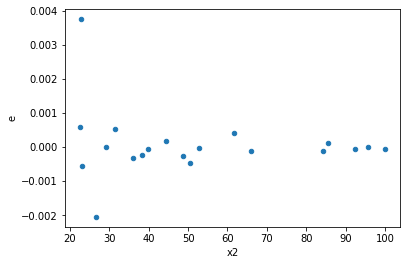

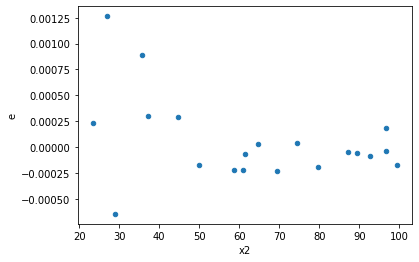

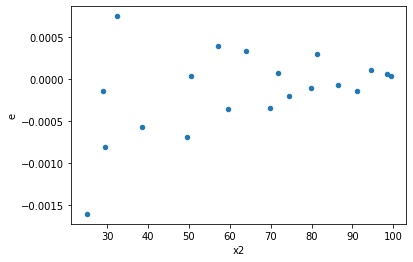

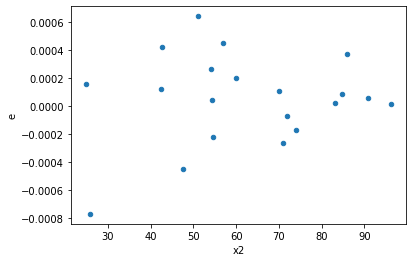

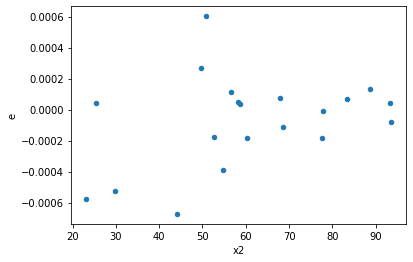

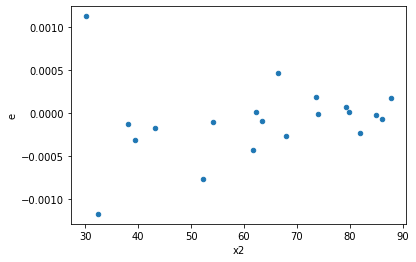

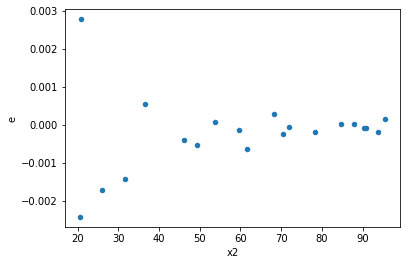

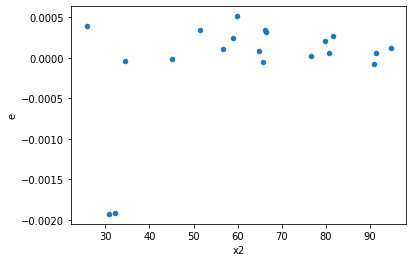

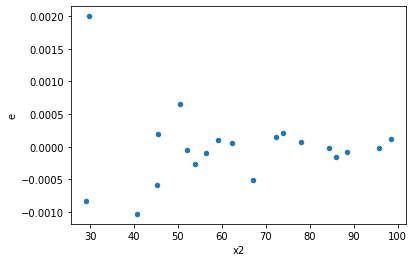

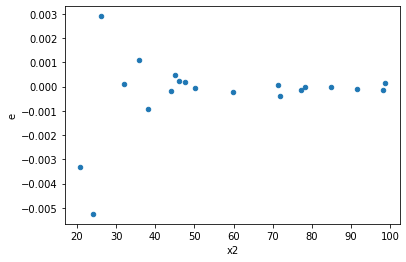

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
37.0,4.0,4.0,3.113715075147695e-08,5.2163708433935134e-08,7.784287687869237e-09,1.3040927108483783e-08,1.6752884311825103,0.6294157121182611,0.6852921439408695,0.31470785605913054,Reject005=1 : Homoscedasticity
146.0,4.0,4.0,2.8979635841995998e-08,4.049438687639341e-08,7.2449089604989995e-09,1.0123596719098352e-08,1.3973393971262658,0.7536637615840647,0.6231681192079677,0.37683188079203234,Reject005=1 : Homoscedasticity
150.0,4.0,4.0,5.089029881472102e-08,9.837680621555701e-08,1.2722574703680255e-08,2.4594201553889253e-08,1.933115122269622,0.5389019685097547,0.7305490157451227,0.26945098425487735,Reject005=1 : Homoscedasticity
177.0,4.0,4.0,1.4671700111778105e-07,1.5832971121098802e-07,3.667925027944526e-08,3.9582427802747005e-08,1.0791504052341183,0.9429246415472301,0.528537679226385,0.47146232077361505,Reject005=1 : Homoscedasticity
639.0,4.0,4.0,1.1580612229205176e-07,1.9026245141758132e-07,2.895153057301294e-08,4.756561285439533e-08,1.6429394893109186,0.6422978803478396,0.6788510598260802,0.3211489401739198,Reject005=1 : Homoscedasticity
658.0,4.0,4.0,1.6097992888347287e-08,2.266078841162634e-08,4.024498222086822e-09,5.665197102906585e-09,1.4076778744280354,0.7484411750005444,0.6257794124997278,0.3742205875002722,Reject005=1 : Homoscedasticity
707.0,4.0,4.0,2.4243357996684236e-08,2.5279683055836746e-08,6.060839499171059e-09,6.3199207639591866e-09,1.0427467621974749,0.968615403031651,0.5156922984841745,0.4843077015158255,Reject005=1 : Homoscedasticity
837.0,4.0,4.0,9.070068963012543e-08,1.1434521860667129e-07,2.267517240753136e-08,2.8586304651667822e-08,1.2606874222562972,0.827796657126072,0.586101671436964,0.413898328563036,Reject005=1 : Homoscedasticity
920.0,4.0,4.0,2.608420435846869e-07,3.2571928388293563e-07,6.521051089617172e-08,8.142982097073391e-08,1.2487223279140782,0.8347674633336681,0.5826162683331659,0.41738373166683407,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,5.477150717249513e-06,7.720732984702076e-08,1.3692876793123782e-06,1.930183246175519e-08,0.014096258042318824,0.001148569436031188,Reject005=0 : Heteroscedasticity
1.0,4.0,4.0,1.5900469587998711e-06,9.142904034403173e-08,3.975117396999678e-07,2.285726008600793e-08,0.057500842876389104,0.017096327796612867,Reject005=0 : Heteroscedasticity
2.0,4.0,4.0,2.3167683160256183e-06,6.068488293773398e-08,5.791920790064046e-07,1.5171220734433494e-08,0.02619376418348037,0.003842681951394142,Reject005=0 : Heteroscedasticity
3.0,4.0,4.0,1.2850910404690544e-07,5.006123861763482e-08,3.212727601172636e-08,1.2515309654408706e-08,0.3895540241208329,0.38342606905274057,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,7.827500827581494e-07,4.416176357305126e-08,1.9568752068953734e-07,1.1040440893262816e-08,0.05641872744036,0.016503693352156984,Reject005=0 : Heteroscedasticity
5.0,4.0,4.0,5.625798155334247e-07,1.0752504357444344e-07,1.4064495388335617e-07,2.688126089361086e-08,0.1911285129781821,0.13795879407691924,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,1.1587886198191142e-05,2.089909508033815e-08,2.8969715495477855e-06,5.224773770084538e-09,0.001803529541358499,1.942276733987128e-05,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,3.0092421993965425e-06,5.78827485633676e-08,7.523105498491356e-07,1.44706871408419e-08,0.01923499164506436,0.002110026649307675,Reject005=0 : Heteroscedasticity
8.0,4.0,4.0,2.050773403645434e-06,4.49030298810797e-08,5.126933509113585e-07,1.1225757470269926e-08,0.02189565643930262,0.002715224480327232,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    790
Reject005=1 : Homoscedasticity      210
Name: Result_test, dtype: int64